<a href="https://colab.research.google.com/github/gnc506/ProgFinalAssess2/blob/main/Volcanos_Assessment_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

General Overview

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

bigdf = pd.read_csv('/content/drive/MyDrive/Data Science MSc/Programming/Assessment 2/output.csv')
bigdf = bigdf.drop(bigdf.columns[0], axis=1)
bigdf = bigdf.drop([0])

vol_data = bigdf[['Year', 'Name', 'Country', 'Type', 'Latitude', 'Longitude', 'Elevation (m)', 'VEI', 'Total Damage ($Mil)', 'Houses Destroyed', 'Total Deaths', 'Total Injuries']]
vol_data = vol_data.fillna(0)
vol_data.describe()


,Year,Latitude,Longitude,Elevation (m),VEI,Total Damage ($Mil),Houses Destroyed,Total Deaths,Total Injuries
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000
mean,1837.583432,15.064574,54.994785,1972.457988,2.165680,6.094712,46.302959,395.139645,58.907692
std,281.943961,25.533988,99.632277,1249.310195,1.550418,80.771193,463.267046,3078.947111,1153.892740
min,46.000000,-63.001000,-177.920000,-642.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1817.000000,-6.770000,-19.666000,1117.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1928.000000,13.257000,110.446000,1728.000000,2.000000,0.000000,0.000000,1.000000,0.000000
75%,1987.000000,36.406000,130.862000,2715.000000,3.000000,0.000000,0.000000,7.000000,0.000000
max,2023.000000,65.715000,177.180000,6377.000000,7.000000,2000.000000,9000.000000,60000.000000,31943.000000


In [28]:
Mode_Name = vol_data['Name'].mode()[0]
Mode_Name

'Merapi'

In [29]:
Mode_Country = vol_data['Country'].mode()[0]
Mode_Country

'Indonesia'

In [30]:
Mode_Type = vol_data['Type'].mode()[0]
Mode_Type

'Stratovolcano'

In [31]:
import plotly.express as px
fig = px.scatter_geo(vol_data, lat='Latitude', lon='Longitude', color='Type', hover_name='Name', title="Map Showing the Distributions of Volcanic Eruptions and their Type")
fig.show()

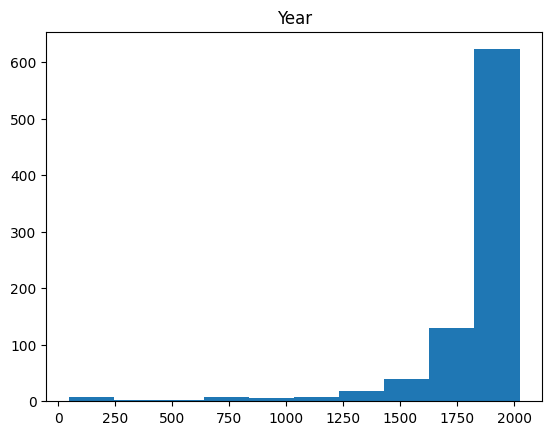

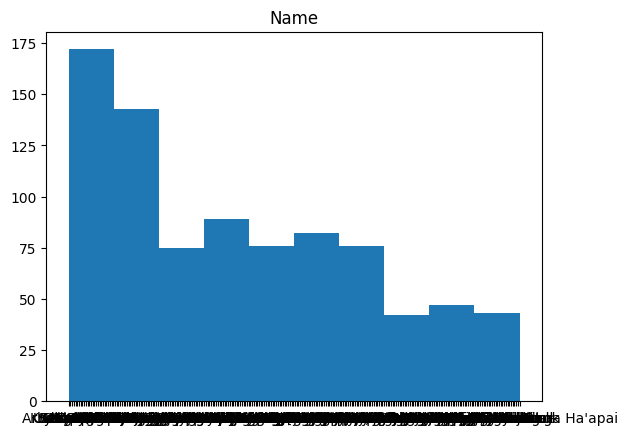

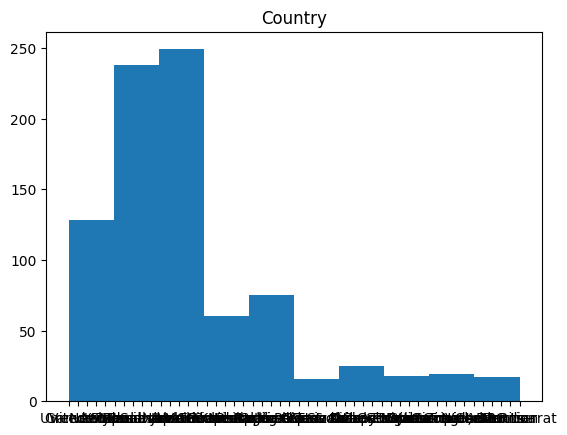

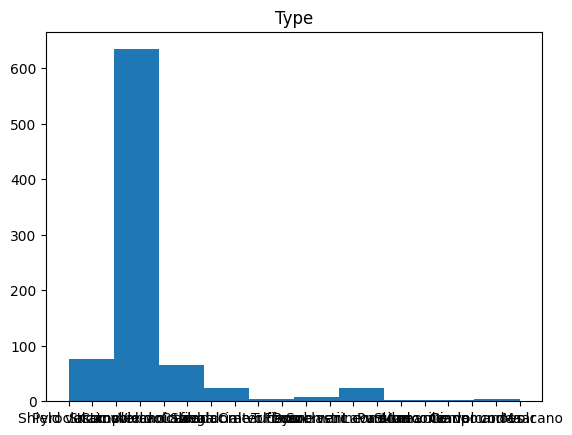

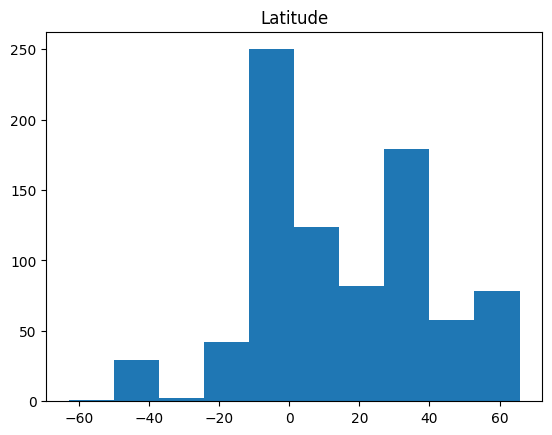

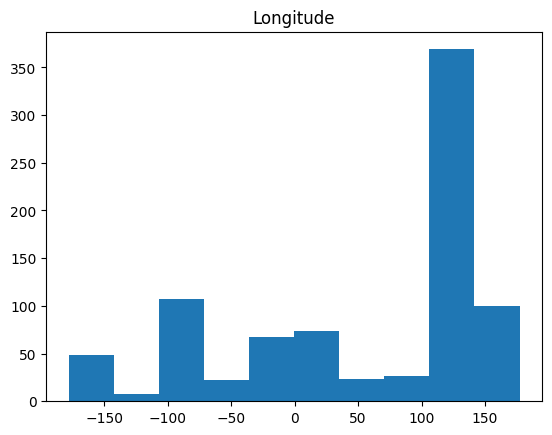

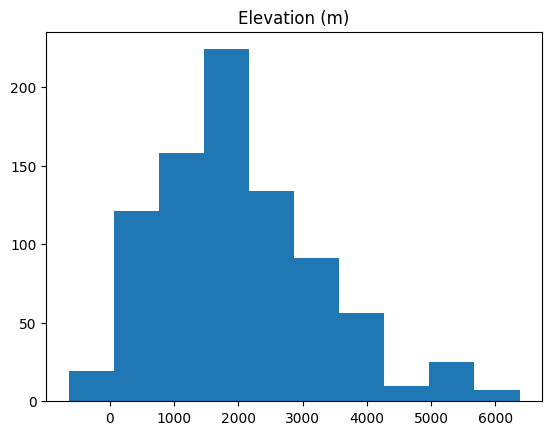

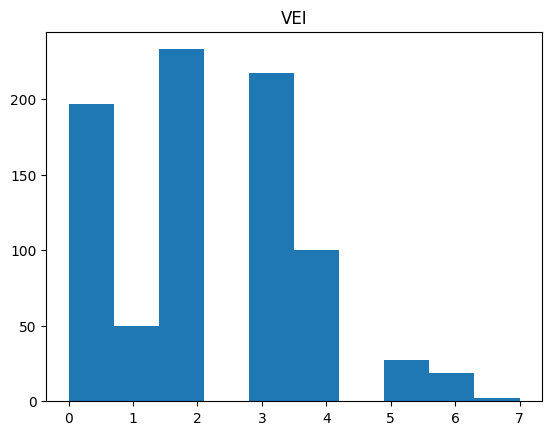

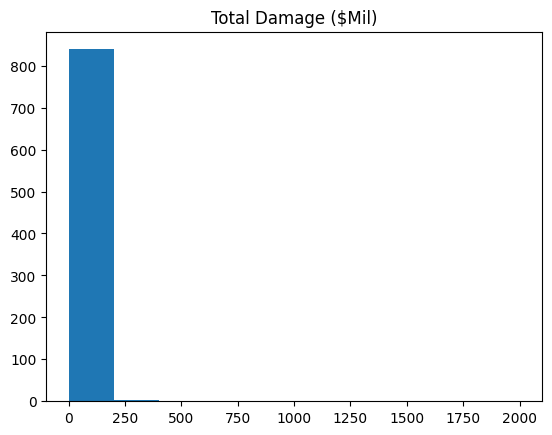

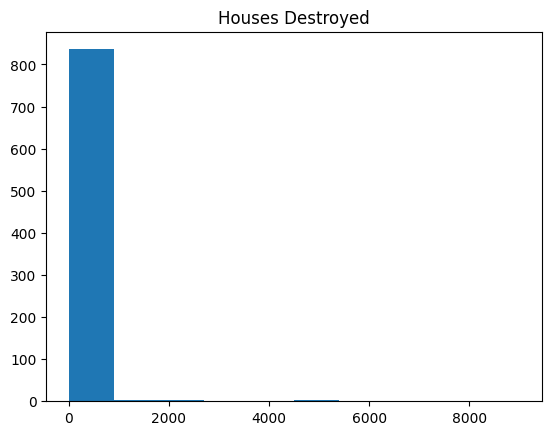

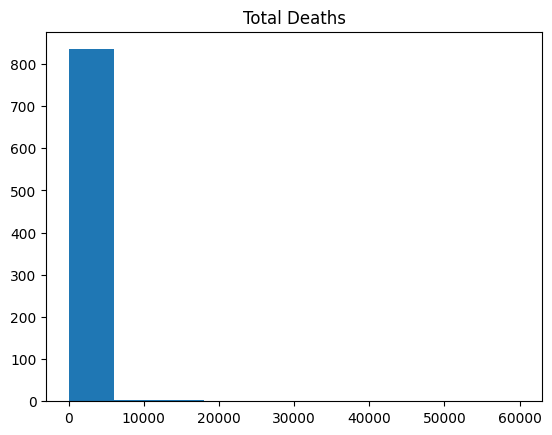

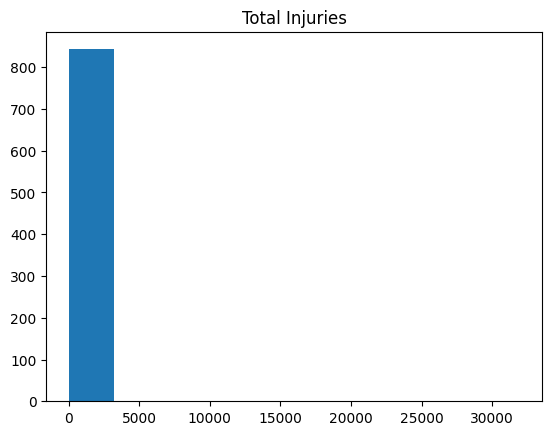

In [32]:
#Check normality of data so correct tests can be performed
import numpy as np
import matplotlib.pyplot as plt

for col in vol_data.columns:
    plt.figure() # create a new figure
    plt.hist(vol_data[col]) # plot the histogram of the column
    plt.title(col) # set the title of the figure as the column name
    plt.show()


### Elevation and Destruction



In [33]:
vol_data["Elevation (m)"] = vol_data["Elevation (m)"].astype(float)
fig2 = px.scatter_geo(vol_data, lat='Latitude', lon='Longitude', color='Elevation (m)', title="Map Showing the Distributions of Volcanic Eruptions and their Elevation")
fig2.show()

In [34]:
figElevationxDeaths = px.scatter(vol_data, x='Elevation (m)', y= 'Total Deaths', trendline='ols', title="Scatter Graph Showing Volcanos Elevation and the combined injuries and deaths")
figElevationxDeaths

In [35]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['Elevation (m)'], vol_data['Total Deaths'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)



0.0908349968873138
0.008241152757486297


In [36]:
figElevationxInjuries = px.scatter(vol_data, x='Elevation (m)', y= 'Total Injuries', trendline='ols', title="Scatter Graph Showing Volcanos Elevation and the combined injuries and deaths")
figElevationxInjuries

In [37]:

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['Elevation (m)'], vol_data['Total Injuries'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)


0.03859449410610958
0.2624344657294122


In [38]:
figElevationxDamage = px.scatter(vol_data, x='Elevation (m)', y= 'Total Damage ($Mil)', trendline='ols', title="Scatter Graph Showing Volcanos Elevation and total damage")
figElevationxDamage

In [39]:
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['Elevation (m)'], vol_data['Total Damage ($Mil)'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)


-0.0079393182318849
0.8177427984572457


In [40]:
figElevationxHomes = px.scatter(vol_data, x='Elevation (m)', y= 'Houses Destroyed', trendline='ols', title="Scatter Graph Showing Volcanos Elevation and houses destroyed")
figElevationxHomes

In [41]:

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['Elevation (m)'], vol_data['Houses Destroyed'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)


0.03050435311605133
0.3758218077264126


## VEI and Destruction

In [42]:
vol_data["VEI"] = vol_data["VEI"].astype(float)
VEIfig = px.scatter_geo(vol_data, lat='Latitude', lon='Longitude', color='VEI', title="Scatter Graph Showing Volcanos VEI and the Year of Eruption")
VEIfig


In [43]:
figVEIxDeaths = px.scatter(vol_data, x='VEI', y='Total Deaths', trendline='ols', title="Scatter Graph Showing Volcanos VEI and the deaths")
figVEIxDeaths

In [44]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['VEI'], vol_data['Total Deaths'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)



0.1314212789559214
0.0001274973105956273


In [45]:
figVEIxInjur = px.scatter(vol_data, x='VEI', y='Total Injuries', trendline='ols', title="Scatter Graph Showing Volcanos VEI and the injuries")
figVEIxInjur

In [46]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['VEI'], vol_data['Total Injuries'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.0005006926126225654
0.9884047270083376


In [47]:
figVEIxDamage = px.scatter(vol_data, x='VEI', y='Total Damage ($Mil)', trendline='ols', title="Scatter Graph Showing Volcanos VEI and the damage")
figVEIxDamage

In [48]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['VEI'], vol_data['Total Damage ($Mil)'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)

-0.02340953540591873
0.49677369063496457


In [49]:
figVEIxHomes = px.scatter(vol_data, x='VEI', y='Houses Destroyed', trendline='ols', title="Scatter Graph Showing Volcanos VEI and the homes destroyed")
figVEIxHomes

In [50]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(vol_data['VEI'], vol_data['Houses Destroyed'], nan_policy='omit')

#print Spearman rank correlation and p-value
print(rho)
print(p)

0.02435716806276113
0.4795090056557533


## Type of Volcano and Desctruction

In [51]:
TypeDeath = px.bar(vol_data, x='Type', y='Total Deaths', color='Name', title="Bar Graph Showing Types of Volcanos and their Total Deaths from Eruptions")
TypeDeath

In [52]:
TypeInjur = px.bar(vol_data, x='Type', y='Total Injuries', color='Name', title="Bar Graph Showing Types of Volcanos and their Total Injuries from Eruptions")
TypeInjur

In [54]:
TypeDamage = px.bar(vol_data, x='Type', y='Total Damage ($Mil)', color='Name', title="Bar Graph Showing Types of Volcanos and their Total Injuries from Eruptions")
TypeDamage

In [55]:
TypeHomes = px.bar(vol_data, x='Type', y='Houses Destroyed', color='Name', title="Bar Graph Showing Types of Volcanos and their Total Injuries from Eruptions")
TypeHomes

In [53]:
#for key,frame in vol_data.groupby("Type"):
  #vol_bar = frame.plot.bar(x="Name", y="Total Deaths", title=key)